# ROK_OCR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2

from driveHelper import GHelper

## 1. 이미지 -> BINARY_INV로

In [2]:
def preprocess_pngs(data_path, save_path, verbose=False):
    png_list = glob.glob(data_path + '*.png')
    thr = 200
    try:
        os.mkdir(save_path)
    except FileExistsError:
        pass
    for file_path in png_list:
        img = cv2.imread(file_path,0)
        img = img[230:850,335:1400]
        ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY_INV)
        png_name = file_path.split('\\')[-1]
        save_name = save_path + png_name[:-4] + "_BINARY_INV.png"
        if verbose:
            print("FROM : {}".format(file_path))
            print("TO : {}".format(save_name))
        cv2.imwrite(save_name, thresh2)

In [3]:
data_path = './upload_samples/'
save_path = './upload_samples/BIN_INV/'
preprocess_pngs(data_path, save_path, True)

FROM : ./upload_samples\Screenshot_2020-05-11-19-01-45.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-01-45_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-00.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-00_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-04.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-04_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-07.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-07_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-11.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-11_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-15.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-15_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-19.png
TO : ./upload_samples/BIN_INV/Screenshot_2020-05-11-19-02-19_BINARY_INV.png
FROM : ./upload_samples\Screenshot_2020-05-11-19-02-22.

## 2. 구글 드라이브를 통한 OCR

# 정확도 떨어져서 아예 한줄씩

In [4]:
def seperate1x1(data_path, save_path, verbose=False):
    png_list = glob.glob(data_path + '*.png')
    try:
        os.mkdir(save_path)
    except FileExistsError:
        pass
    id_num = 0
    for file_path in png_list:
        img = cv2.imread(file_path, 0)
        height, width = img.shape

        png_name = file_path.split('\\')[-1]
        save_name = save_path + png_name[:-4]

        # height sep
        for x in range(6):
            fidx = int(x * height/6)
            eidx = int((x+1) * height/6)
            plt.imshow(img[fidx:eidx, :], 'gray')

            if verbose:
                print("FROM : {}".format(file_path))
                print("TO : {}".format(save_name + "_{}.png".format(id_num)))
            cv2.imwrite(save_name + "_{}.png".format(id_num), img[fidx:eidx, :])
            id_num += 1

FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_0.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_1.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_2.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_3.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_4.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-01-45_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_5.png
FROM : ./upload_

FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-02-57_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-57_BINARY_INV_94.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-02-57_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-57_BINARY_INV_95.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-03-01_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-01_BINARY_INV_96.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-03-01_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-01_BINARY_INV_97.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-03-01_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-01_BINARY_INV_98.png
FROM : ./upload_samples/BIN_INV\Screenshot_2020-05-11-19-03-01_BINARY_INV.png
TO : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-01_BINARY_INV_99.png
FROM : ./u

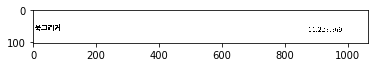

In [5]:
data_path3 = './upload_samples/BIN_INV/'
save_path3 = './upload_samples/BIN_INV/onexone/'
seperate1x1(data_path3, save_path3, True)

In [6]:
data_path3 = './upload_samples/BIN_INV/'
save_path3 = './upload_samples/BIN_INV/onexone/'

In [7]:
gh = GHelper()

### 2.1 create floder

In [8]:
folder_id = gh.create_folder('temp_rok_ocr')

### 2.2 upload

folder_id invoces/rok_cor : '1LREb_uoCXV6ELURQW25fbfzEP01puwHt'

In [9]:
gh = GHelper()

In [10]:
# folder_id = '1LREb_uoCXV6ELURQW25fbfzEP01puwHt'
file_names = glob.glob(save_path3 + '*.png')
file_ids = []

In [11]:
upload_len = len(file_names)
for i, file_name in enumerate(file_names):
    fn = os.path.basename(file_name)
    fp = os.path.dirname(file_name) + '/'
    print("Start Uploading ({}/{}) : {}".format(i+1, upload_len, fp+fn))
    file_id = gh.upload(fn, fp, folder_id=folder_id, as_docs=True, verbose=True)
    file_ids.append(file_id)

Start Uploading (1/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_0.png
File ID: 1vT3rqtFPrKLNA-Wxmws9AIpc80Gc56cIRJowGn6z7Jg
Start Uploading (2/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_1.png
File ID: 1DwPiZBstPnte17xDIRfdUtywDrMEhTxVSmE-3eoriBQ
Start Uploading (3/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_2.png
File ID: 1umIccg0IqXg4kj7qtTIWO_V1XUItO2vn9RsiLfvugQ0
Start Uploading (4/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_3.png
File ID: 1UFoG7NOu8rKo7lbhXXnuLxBLz5pZq6ovGZqknTLq8oE
Start Uploading (5/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_4.png
File ID: 1c4zqVVAnknFbpqJuq6SXDpZYD7PbqcCEAYYsZPiQwbA
Start Uploading (6/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-01-45_BINARY_INV_5.png
File ID: 1Hqr08cO0y_fQLVbi6jbTY-f5H5RNRUb2oqjZNK1FITI
Start Uploading (7/138) : ./upload

File ID: 1_QMVvmHzkPI2RY-GrrR8odEErfZEXbTnNfppKJd67vc
Start Uploading (52/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-26_BINARY_INV_51.png
File ID: 15CnZL6H6RhbG0B9PKeXP9uZcdfeFXKsoH53H7rsxJVc
Start Uploading (53/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-26_BINARY_INV_52.png
File ID: 1gp42MoTOAe-2_XOxCgfGVfRBCYQ-pCOXU1hOpj1VbRE
Start Uploading (54/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-26_BINARY_INV_53.png
File ID: 1vNAkdxO4tBURCMZcx29fAaqHI8QfEOMsrLU915g0mW0
Start Uploading (55/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-30_BINARY_INV_54.png
File ID: 1G-Tnr5syfpDmoixvEXec5GUlWY7-MlW3q_DfELtsmvU
Start Uploading (56/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-30_BINARY_INV_55.png
File ID: 14dk8SqpS2nG7eCeI1Qn4sxrEonH8ETi4oOhNSGQb_z8
Start Uploading (57/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-02-30_BINARY_INV_56.png
File ID: 1W0I7iupB7-Tb

File ID: 1jgtRr-JJb2vyB1RLYbunA5HKrOgIdfyICepJEZYSKVY
Start Uploading (103/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_102.png
File ID: 12SS6l-Y6UtZUXEK8vYWqkacVR1AxolB7SaCMl87zOtg
Start Uploading (104/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_103.png
File ID: 1Aiq3to8dVp8ULlQHe08UAjNUcGxF4JfEfgO8d1anPEg
Start Uploading (105/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_104.png
File ID: 1MZ51-O3wBVBT8ftEyi17ijInMGApFdl5Q_5R0xEdmqI
Start Uploading (106/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_105.png
File ID: 1ceOpQ3inNfW9AjZngFhYwZy94yPANM4Nh_LmG3Onlr4
Start Uploading (107/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_106.png
File ID: 17wxW9ZUgiHXCO2u9aAC7J4Apa7vQnxL4FyiGJIrCjC8
Start Uploading (108/138) : ./upload_samples/BIN_INV/onexone/Screenshot_2020-05-11-19-03-04_BINARY_INV_107.png
File ID: 1

### 2.3 download

In [12]:
save_path= './download_sample/onexone/'

In [13]:
download_len = len(file_ids)
for i, file_id in enumerate(file_ids):
    print("Start Downloading ({}/{}) : {}".format(i+1, download_len, file_id))
    gh.download(file_id, save_path, verbose=True)

Start Downloading (1/138) : 1vT3rqtFPrKLNA-Wxmws9AIpc80Gc56cIRJowGn6z7Jg
Screenshot_2020-05-11-19-01-45_BINARY_INV_0.txt Download 100%.
Start Downloading (2/138) : 1DwPiZBstPnte17xDIRfdUtywDrMEhTxVSmE-3eoriBQ
Screenshot_2020-05-11-19-01-45_BINARY_INV_1.txt Download 100%.
Start Downloading (3/138) : 1umIccg0IqXg4kj7qtTIWO_V1XUItO2vn9RsiLfvugQ0
Screenshot_2020-05-11-19-01-45_BINARY_INV_2.txt Download 100%.
Start Downloading (4/138) : 1UFoG7NOu8rKo7lbhXXnuLxBLz5pZq6ovGZqknTLq8oE
Screenshot_2020-05-11-19-01-45_BINARY_INV_3.txt Download 100%.
Start Downloading (5/138) : 1c4zqVVAnknFbpqJuq6SXDpZYD7PbqcCEAYYsZPiQwbA
Screenshot_2020-05-11-19-01-45_BINARY_INV_4.txt Download 100%.
Start Downloading (6/138) : 1Hqr08cO0y_fQLVbi6jbTY-f5H5RNRUb2oqjZNK1FITI
Screenshot_2020-05-11-19-01-45_BINARY_INV_5.txt Download 100%.
Start Downloading (7/138) : 1swivDf1AF7Z6zqhaKMR3a9iey-waq4ABF5b6j64hGA0
Screenshot_2020-05-11-19-02-00_BINARY_INV_10.txt Download 100%.
Start Downloading (8/138) : 1NrriNbTL4C8pzqJnqB

Screenshot_2020-05-11-19-02-30_BINARY_INV_59.txt Download 100%.
Start Downloading (61/138) : 1ZNYoAr_y1CyKDGiWB9iayhwDi0genYuFzkSPz_gBrnw
Screenshot_2020-05-11-19-02-38_BINARY_INV_60.txt Download 100%.
Start Downloading (62/138) : 1ehQrxUuM-2K0ZhPaUbObuYOyILK6Koxli6bYFvTMaX8
Screenshot_2020-05-11-19-02-38_BINARY_INV_61.txt Download 100%.
Start Downloading (63/138) : 1SSOmee2KuIf3OZ64kPExCPIyPXDpviOlPWYq64t6zCE
Screenshot_2020-05-11-19-02-38_BINARY_INV_62.txt Download 100%.
Start Downloading (64/138) : 1XsjX4VNsuCHOgIQAd9UNIKL2htDvmPlpAw8YFpQhbVU
Screenshot_2020-05-11-19-02-38_BINARY_INV_63.txt Download 100%.
Start Downloading (65/138) : 1cWH6rGf0ekCJQ9v_PvBj387JLJ_cqSF0jcRPeWHFh5I
Screenshot_2020-05-11-19-02-38_BINARY_INV_64.txt Download 100%.
Start Downloading (66/138) : 1TAFpXcPLN67fQ2ZgsqjzMEa6GgwTfEUj6AB-YzMPF8Y
Screenshot_2020-05-11-19-02-38_BINARY_INV_65.txt Download 100%.
Start Downloading (67/138) : 1_HZgoFU-iWuSY0Zql4TtqjtxLn96hAaI5yj3Coymu2o
Screenshot_2020-05-11-19-02-42_BIN

Screenshot_2020-05-11-19-03-11_BINARY_INV_119.txt Download 100%.
Start Downloading (121/138) : 1v99rrl7Ln5KiWPw8fwBlmHLRJVZHTLmmUs20P9O4ZsE
Screenshot_2020-05-11-19-03-16_BINARY_INV_120.txt Download 100%.
Start Downloading (122/138) : 1IEG8d7PlU8PXtyoSmrTINzb7au7RbXd8zz2Do23_pWk
Screenshot_2020-05-11-19-03-16_BINARY_INV_121.txt Download 100%.
Start Downloading (123/138) : 1J0L4qfWLzSkRAyGJu8OWtgjqUtA1MQoCrhrU6pEL_9I
Screenshot_2020-05-11-19-03-16_BINARY_INV_122.txt Download 100%.
Start Downloading (124/138) : 10Sdkg0vtZLYS4mutPs_wIDiKh1rwIO0XRG5k-AqP9Mc
Screenshot_2020-05-11-19-03-16_BINARY_INV_123.txt Download 100%.
Start Downloading (125/138) : 1Etf8WmYmehKekKUa1pj1qHWL12c2fOkIM3vJwqNkjz4
Screenshot_2020-05-11-19-03-16_BINARY_INV_124.txt Download 100%.
Start Downloading (126/138) : 1huTM9MywgUE4iE5dGqfiKEgq5czL5i7BX3l8VrDZF04
Screenshot_2020-05-11-19-03-16_BINARY_INV_125.txt Download 100%.
Start Downloading (127/138) : 1obJ9UfDUwipbcx4F5bciMqBLw6HOsKYIpPE89FLLgdU
Screenshot_2020-05-1

### 2.4 delete folder

In [19]:
gh.delete(folder_id)

# text 후처리

In [21]:
txt_path = './download_sample/onexone/'
txt_names = glob.glob(txt_path + '*.txt')

In [22]:
ocr_results3 = []
for txt_name in txt_names:
    file_num = os.path.basename(txt_name).split('.')[0].split('_')[-1]
    with open(txt_name, 'r', encoding='utf-8-sig') as f:
        a = f.readlines()
        f.close()
        a = list(map(str.strip, a))
        for i in reversed(range(len(a))):
            a[i] = ''.join(a[i].split(','))
            a[i] = ''.join(a[i].split('.'))
            if a[i].count('_') > 5:
                a.pop(i)
        if not a[0]:
            a.pop(0)
        a.append(file_num)
        ocr_results3.append(a)

In [23]:
ocr_results3

[['폭풍검 맹주', '92766209', '0'],
 ['외돌', '64868740', '1'],
 ['Big Sish', '62022496', '2'],
 ['三國 알콜홀릭 장비', '57306656', '3'],
 ['폭풍 돌팸 황충', '54904940', '4'],
 ['방범은순찰', '54080839', '5'],
 ['유감토깽이', '44283716', '10'],
 ['불', '곰', '43482552', '-', '11'],
 ['행성파괴범', '50473307', '6'],
 ['北 안감독', '48509544', '7'],
 ['6072리', '47257891', '8'],
 ['폭풍JOKER 성인', '45310635', '9'],
 ['수정', '43332529', '12'],
 ['유로', '42464132', '13'],
 ['포유', '40871073', '14'],
 ['40248685', '15'],
 ['꽃', '0009', '40025455', '16'],
 ['찬사 대사', '39847285', '17'],
 ['북덕북덕', '39518411', '18'],
 ['北 서태웅', '38886046', '19'],
 ['혈마', '38096739', '20'],
 ['꼬따발', '37858456', '명장', '21'],
 ['폭풍을지 고문', '37381148', '22'],
 ['폭풍 캠핑', '37166287', '23'],
 ['폭풍 청산', '36809482', '24'],
 ['아버', '36443701', '25'],
 ['36210964', '26'],
 ['액트', '36038023', '27'],
 ['미산M', '36033619', '28'],
 ['약먹', '35703165', '29'],
 ['조시안서', '35630079', '30'],
 ['fireworkcorki', '35364942', '31'],
 ['우강다', '35267342', '32'],
 ['기범아마', '35199968', '33']

In [24]:
for i, elem in enumerate(ocr_results3):
    if len(elem) != 3:
        print(i, len(elem), elem)

7 5 ['불', '곰', '43482552', '-', '11']
15 2 ['40248685', '15']
16 4 ['꽃', '0009', '40025455', '16']
21 4 ['꼬따발', '37858456', '명장', '21']
26 2 ['36210964', '26']
39 2 ['33774111', '39']
59 2 ['30332361', '59']
89 4 ['26160236', 'Dragonyy', '26460236', '89']
